In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [6]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.shape
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


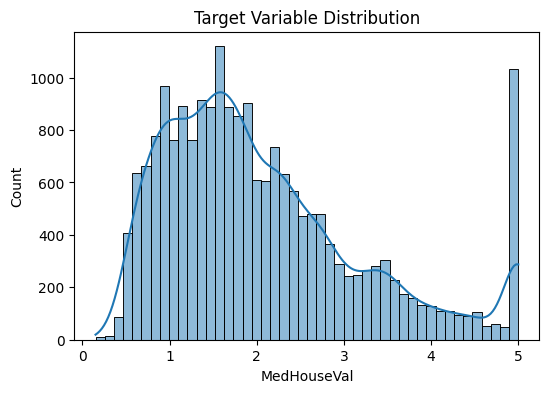

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Target Variable Distribution")
plt.show()


In [9]:
df.isnull().sum()
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)


In [10]:
df.duplicated().sum()
df = df.drop_duplicates()


In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)


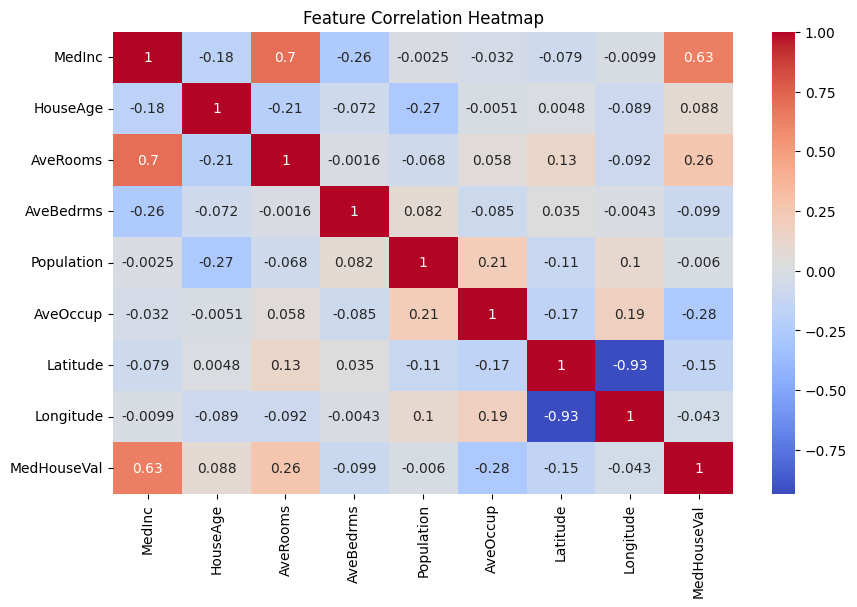

In [14]:
df.describe()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [17]:
def evaluate_model(y_true, y_pred, name):
    print(f"--- {name} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2:", r2_score(y_true, y_pred))
    print()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


--- Linear Regression ---
MAE: 0.3781902708927235
MSE: 0.269916852380573
RMSE: 0.5195352272758538
R2: 0.6912133492146089

--- Ridge Regression ---
MAE: 0.3781661668135242
MSE: 0.2698586348451931
RMSE: 0.5194791957770717
R2: 0.6912799504572078

--- Lasso Regression ---
MAE: 0.37861633167050807
MSE: 0.2693926316870866
RMSE: 0.5190304727923849
R2: 0.6918130611288018



In [18]:
coefficients = pd.Series(lr.coef_, index=poly.get_feature_names_out(X.columns))
coefficients.sort_values(ascending=False).head(10)


MedInc                0.586944
Latitude Longitude    0.328613
AveRooms Latitude     0.275281
AveRooms Longitude    0.228455
Latitude^2            0.186240
Longitude^2           0.120802
HouseAge              0.113716
MedInc Population     0.087041
MedInc AveRooms       0.076539
AveBedrms             0.066608
dtype: float64